/Users/nickvazz/miniconda3/envs/drlnd/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


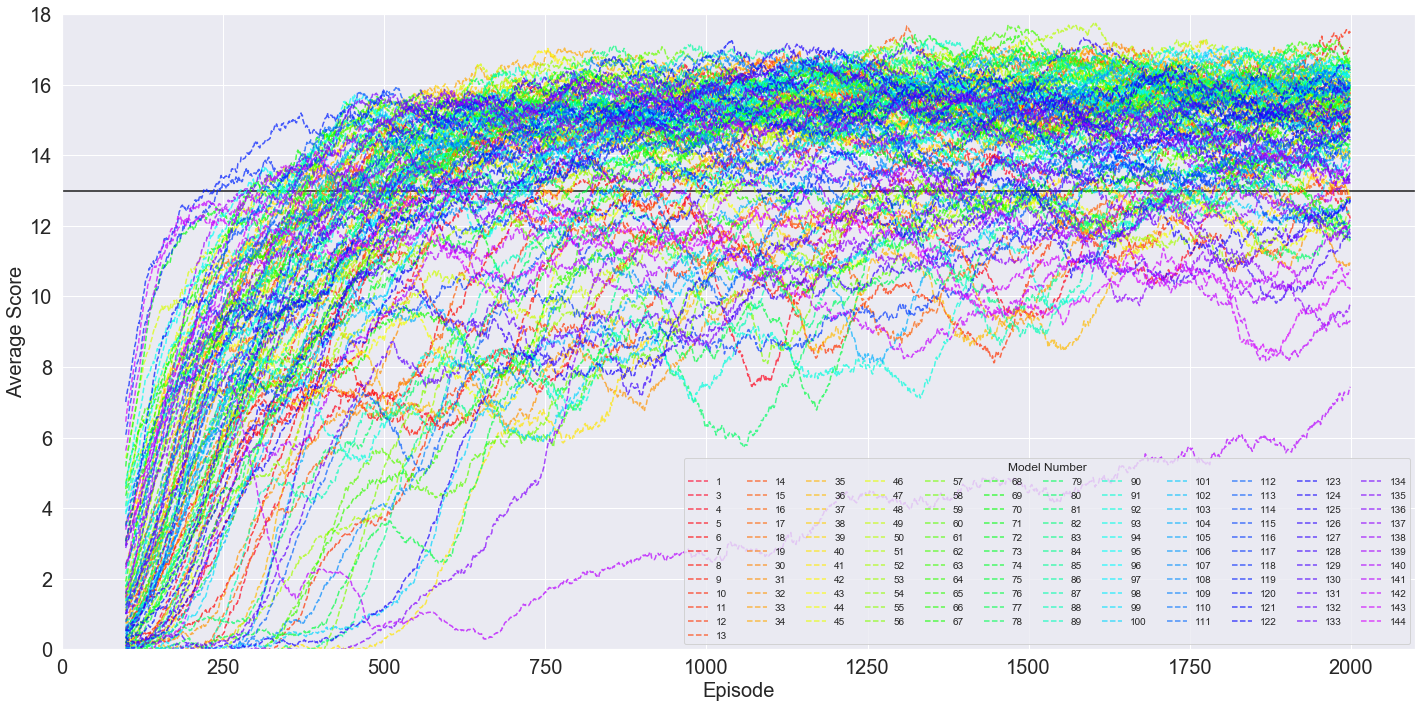

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
sns.set()
import json
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes', labelsize=20) 

result_values = 'results'
result_values = 'results-noPixels'


params = !ls {result_values}/*/*.json
scores = !find {result_values}/*/*.csv


dfs = []
for file in scores:
    name = file.split('/')[1].split('-')[1]
    df = pd.read_csv(file)
    if name[0] == '2':
        continue
    df['trial'] = int(name)
    dfs.append(df)
    
df = pd.concat(dfs)
means = df.groupby('trial')['score','episode'].rolling(100).mean().reset_index()

fig, ax = plt.subplots(1, figsize=(20,10))

cmap = plt.cm.gist_rainbow

ax.set_color_cycle([cmap(i) for i in np.linspace(0, 1, len(scores))])
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_prop_cycle.html

winning_iteration = []
for idx, group in enumerate(means.groupby('trial')):
    group[1].plot(x='level_1', y='score',ax=ax, label=group[0], linestyle='--', alpha=0.7)
    try:
        winning_iteration.append([group[0], group[1][group[1]['score'] > 13]['level_1'].iloc[0]])
    except:
        winning_iteration.append([group[0],np.nan])

winning_iteration = pd.DataFrame(winning_iteration, columns=['model_num', 'win_iter'])

legend = plt.legend(title="Model Number", ncol=12, fontsize='small', fancybox=True)
plt.hlines(13, 0, 2100)
plt.xlim(0,2100)
plt.ylim(0,18)
plt.xlabel('Episode')
plt.ylabel('Average Score')
plt.tight_layout()
plt.savefig(f'{result_values}.png')
plt.show()

In [45]:
winning_ave = winning_iteration.copy()

winning_ave['model'] = [int(str(x)[:-2]) for x in winning_ave['model_num']]
# print (winning_ave.groupby('model')['win_iter'].mean().sort_values())
descriptions = winning_ave.groupby('model')['win_iter'].describe().sort_values('mean')
descriptions.drop('count',axis=1, inplace=True)
descriptions['std'] = descriptions['std'].round(2)
print (descriptions)
descriptions.to_csv(f'{result_values}-seed-best.csv')

        mean     std    min    25%    50%    75%     max
model                                                   
138    319.8   78.82  241.0  266.0  284.0  392.0   416.0
118    365.6   97.63  240.0  317.0  347.0  439.0   485.0
134    382.2  103.36  250.0  308.0  396.0  456.0   501.0
95     416.6  145.66  208.0  364.0  401.0  551.0   559.0
119    535.4  407.01  195.0  282.0  444.0  532.0  1224.0


In [31]:


df_params = []
for p in params:
    with open(p, 'r') as f:
        temp_df = pd.DataFrame(json.load(f), index=[0])
        temp_df['model'] = p.split('/')[1]
        df_params.append(temp_df)
        
        
df_params = pd.concat(df_params)
df_params['model_num'] = df_params['model_num'].astype(int)
df_params['GAMMA'] = df_params['GAMMA'].astype(float)

data = pd.merge(df_params, winning_iteration, on='model_num')

skip_cols = []
for col in data.columns:
    if len(data[col].unique()) == 1:
        skip_cols.append(col)
        
print (len(data))
data = data.drop(skip_cols + ['model_num'], axis=1)
data.set_index('model', inplace=True)


print (data.columns)

data = data.sort_values('win_iter')

print (data)

for col in data.columns[:-1]:
    print (data.head(5)[col].value_counts())

25
Index(['GAMMA', 'UPDATE_EVERY', 'seed', 'num_units', 'win_iter'], dtype='object')
             GAMMA  UPDATE_EVERY  seed  num_units  win_iter
model                                                      
model-11910   0.99             1    10         16       195
model-9510    0.98             1    10         16       208
model-11850   0.99             1    50         32       240
model-13850   1.00             2    50         32       241
model-13450   1.00             3    50         32       250
model-13830   1.00             2    30         32       266
model-11920   0.99             1    20         16       282
model-13820   1.00             2    20         32       284
model-13430   1.00             3    30         32       308
model-11830   0.99             1    30         32       317
model-11840   0.99             1    40         32       347
model-9540    0.98             1    40         16       364
model-13840   1.00             2    40         32       392
model-13420   1

In [32]:
data.to_csv(f'{result_values}.csv')

In [36]:
# nums = map(lambda x: x.split('-')[1], data.index.values)

# new_nums = list(map(lambda x: int(x[:3]), nums))
# for idx, num in enumerate(new_nums):
#     if str(num)[0] == '9':
#         new_nums[idx] = int(str(num)[:2])
        

# stuff = np.array(zip(new_nums, data.win_iter))
# plt.scatter(stuff[:,1], stuff[:,0])
# print (stuff)